In [31]:
import random
import pandas as pd
import numpy as np
from tqdm import tqdm
import sqlite3
from matplotlib import pyplot as plt
from datetime import date, datetime, timedelta
from collections import defaultdict
import seaborn as sns

In [75]:
#pull in data
con = sqlite3.connect('nba.db')

team_basic_boxscores_df = pd.read_sql('select * from team_basic_boxscores', con)
team_advanced_boxscores_df = pd.read_sql('select * from team_advanced_boxscores', con)

team_boxscores_df = team_basic_boxscores_df.merge(team_advanced_boxscores_df, how='inner', on=['GAME_ID', 'TEAM_ID'])

pd.set_option('display.max_columns', None)
team_boxscores_df.head()

,SEASON,TEAM_ID,TEAM_ABBREVIATION_x,TEAM_NAME_x,GAME_ID,GAME_DATE,MATCHUP,WL,MIN_x,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_NAME_y,TEAM_ABBREVIATION_y,TEAM_CITY,MIN_y,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
0,2021-22,1610612747,LAL,Los Angeles Lakers,0022100002,2021-10-19,LAL vs. GSW,L,240,45,95,0.474,15,42,0.357,9,19,0.474,5,40,45,21,7,4,18,25,114,-7,Lakers,LAL,Los Angeles,240:00,98.0,101.8,106.0,107.1,-8.0,-5.3,0.467,1.17,14.8,0.189,0.759,0.477,15.469,16.1,0.553,0.551,1.0,0.198,115.28,112.5,93.75,112.0,0.422
1,2021-22,1610612744,GSW,Golden State Warriors,0022100002,2021-10-19,GSW @ LAL,W,240,41,93,0.441,14,39,0.359,25,30,0.833,9,41,50,30,9,2,17,18,121,7,Warriors,GSW,Golden State,240:00,106.0,107.1,98.0,101.8,8.0,5.3,0.732,1.76,19.6,0.241,0.811,0.523,14.886,15.0,0.516,0.570,1.0,0.200,115.28,112.5,93.75,113.0,0.578
2,2021-22,1610612751,BKN,Brooklyn Nets,0022100001,2021-10-19,BKN @ MIL,L,240,37,84,0.440,17,32,0.531,13,23,0.565,5,39,44,19,3,9,13,17,104,-23,Nets,BKN,Brooklyn,240:00,101.8,102.0,117.7,124.5,-15.8,-22.5,0.514,1.46,15.1,0.176,0.707,0.459,12.730,12.7,0.542,0.552,1.0,0.200,105.02,102.0,85.00,102.0,0.407
3,2021-22,1610612749,MIL,Milwaukee Bucks,0022100001,2021-10-19,MIL vs. BKN,W,240,48,105,0.457,17,45,0.378,14,18,0.778,13,41,54,25,8,9,8,19,127,23,Bucks,MIL,Milwaukee,240:00,117.7,124.5,101.8,102.0,15.8,22.5,0.521,3.13,17.1,0.293,0.824,0.541,7.413,7.8,0.538,0.562,1.0,0.194,105.02,102.0,85.00,102.0,0.593
4,2021-22,1610612754,IND,Indiana Pacers,0022100003,2021-10-20,IND @ CHA,L,240,42,90,0.467,17,47,0.362,21,24,0.875,8,43,51,29,2,10,17,24,122,-1,Pacers,IND,Indiana,240:00,111.4,114.0,107.1,116.0,4.3,-2.0,0.690,1.71,19.8,0.255,0.667,0.487,15.517,15.9,0.561,0.607,1.0,0.199,112.22,106.5,88.75,107.0,0.520


In [33]:
#add home team flag
team_boxscores_df['HOME_TEAM'] = team_boxscores_df['MATCHUP'].str[4] == 'v'

team_boxscores_df['HOME_TEAM']

0         True
1        False
2        False
3         True
4        False
         ...  
56299    False
56300    False
56301     True
56302    False
56303     True
Name: HOME_TEAM, Length: 56304, dtype: bool

In [34]:
team_boxscores_df.columns

Index(['SEASON', 'TEAM_ID', 'TEAM_ABBREVIATION_x', 'TEAM_NAME_x', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN_x', 'FGM', 'FGA', 'FG_PCT', 'FG3M',
       'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST',
       'STL', 'BLK', 'TOV', 'PF', 'PTS', 'PLUS_MINUS', 'TEAM_NAME_y',
       'TEAM_ABBREVIATION_y', 'TEAM_CITY', 'MIN_y', 'E_OFF_RATING',
       'OFF_RATING', 'E_DEF_RATING', 'DEF_RATING', 'E_NET_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TOV', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'E_TM_TOV_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT',
       'E_USG_PCT', 'E_PACE', 'PACE', 'PACE_PER40', 'POSS', 'PIE',
       'HOME_TEAM'],
      dtype='object')

In [35]:
team_boxscores_df.drop(columns=['TEAM_ABBREVIATION_x',
                                'TEAM_NAME_x',
                                'MATCHUP',
                                'TEAM_NAME_y',
                                'TEAM_ABBREVIATION_y',
                                'MIN_y'], inplace=True)
team_boxscores_df.rename(columns={'MIN_x':'MIN'}, inplace=True)
team_boxscores_df.head()

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,HOME_TEAM
0,2021-22,1610612747,0022100002,2021-10-19,L,240,45,95,0.474,15,42,0.357,9,19,0.474,5,40,45,21,7,4,18,25,114,-7,Los Angeles,98.0,101.8,106.0,107.1,-8.0,-5.3,0.467,1.17,14.8,0.189,0.759,0.477,15.469,16.1,0.553,0.551,1.0,0.198,115.28,112.5,93.75,112.0,0.422,True
1,2021-22,1610612744,0022100002,2021-10-19,W,240,41,93,0.441,14,39,0.359,25,30,0.833,9,41,50,30,9,2,17,18,121,7,Golden State,106.0,107.1,98.0,101.8,8.0,5.3,0.732,1.76,19.6,0.241,0.811,0.523,14.886,15.0,0.516,0.570,1.0,0.200,115.28,112.5,93.75,113.0,0.578,False
2,2021-22,1610612751,0022100001,2021-10-19,L,240,37,84,0.440,17,32,0.531,13,23,0.565,5,39,44,19,3,9,13,17,104,-23,Brooklyn,101.8,102.0,117.7,124.5,-15.8,-22.5,0.514,1.46,15.1,0.176,0.707,0.459,12.730,12.7,0.542,0.552,1.0,0.200,105.02,102.0,85.00,102.0,0.407,False
3,2021-22,1610612749,0022100001,2021-10-19,W,240,48,105,0.457,17,45,0.378,14,18,0.778,13,41,54,25,8,9,8,19,127,23,Milwaukee,117.7,124.5,101.8,102.0,15.8,22.5,0.521,3.13,17.1,0.293,0.824,0.541,7.413,7.8,0.538,0.562,1.0,0.194,105.02,102.0,85.00,102.0,0.593,True
4,2021-22,1610612754,0022100003,2021-10-20,L,240,42,90,0.467,17,47,0.362,21,24,0.875,8,43,51,29,2,10,17,24,122,-1,Indiana,111.4,114.0,107.1,116.0,4.3,-2.0,0.690,1.71,19.8,0.255,0.667,0.487,15.517,15.9,0.561,0.607,1.0,0.199,112.22,106.5,88.75,107.0,0.520,False


In [36]:
#check for misssing values
team_boxscores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56304 entries, 0 to 56303
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEASON        56304 non-null  object 
 1   TEAM_ID       56304 non-null  int64  
 2   GAME_ID       56304 non-null  object 
 3   GAME_DATE     56304 non-null  object 
 4   WL            56304 non-null  object 
 5   MIN           56304 non-null  int64  
 6   FGM           56304 non-null  int64  
 7   FGA           56304 non-null  int64  
 8   FG_PCT        56304 non-null  float64
 9   FG3M          56304 non-null  int64  
 10  FG3A          56304 non-null  int64  
 11  FG3_PCT       56304 non-null  float64
 12  FTM           56304 non-null  int64  
 13  FTA           56304 non-null  int64  
 14  FT_PCT        56304 non-null  float64
 15  OREB          56304 non-null  int64  
 16  DREB          56304 non-null  int64  
 17  REB           56304 non-null  int64  
 18  AST           56304 non-nu

In [37]:
#look into missing rebound percentage stats
oreb_pct_calc = np.empty(len(team_boxscores_df))
dreb_pct_calc = np.empty(len(team_boxscores_df))
reb_pct_calc = np.empty(len(team_boxscores_df))

for i, row in tqdm(team_boxscores_df.iterrows()):
    game_id = row['GAME_ID']
    team_id = row['TEAM_ID']
    
    opp_row = team_boxscores_df[team_boxscores_df['GAME_ID'] == game_id]
    opp_row = opp_row[opp_row['TEAM_ID'] != team_id]
    
    oreb_pct_calc[i] = row['OREB'] / (row['OREB'] + opp_row['DREB'])
    dreb_pct_calc[i] = row['DREB'] / (row['DREB'] + opp_row['OREB'])
    reb_pct_calc[i] = row['REB'] / (row['REB'] + opp_row['REB'])

team_boxscores_df['OREB_PCT_CALC'] = oreb_pct_calc
team_boxscores_df['DREB_PCT_CALC'] = dreb_pct_calc
team_boxscores_df['REB_PCT_CALC'] = reb_pct_calc


#calculate error of calculated stats
team_boxscores_df['OREB_PCT_CALC_DIFF'] = team_boxscores_df['OREB_PCT'] - team_boxscores_df['OREB_PCT_CALC']
team_boxscores_df['DREB_PCT_CALC_DIFF'] = team_boxscores_df['DREB_PCT'] - team_boxscores_df['DREB_PCT_CALC']
team_boxscores_df['REB_PCT_CALC_DIFF'] = team_boxscores_df['REB_PCT'] - team_boxscores_df['REB_PCT_CALC']



56304it [10:12, 91.96it/s] 


Text(0, 0.5, 'count')

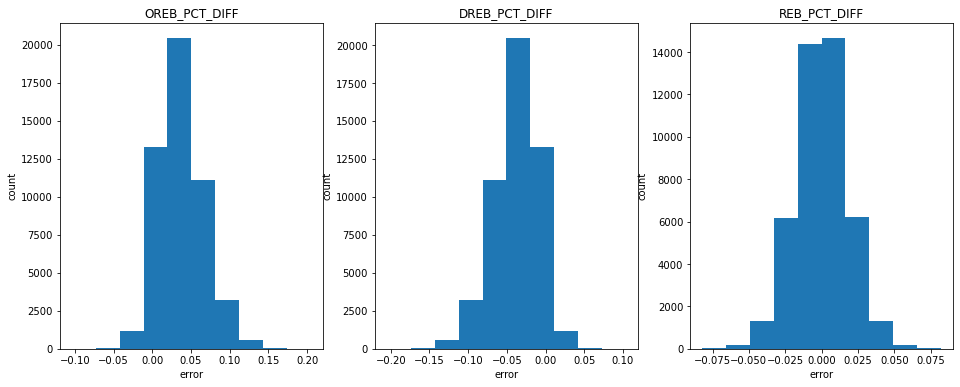

In [38]:
#plot error of calculated rebound percentage stats
fig, axes = plt.subplots(1, 3, figsize=[16, 6])

axes[0].hist(team_boxscores_df['OREB_PCT_CALC_DIFF'])
axes[0].set_title('OREB_PCT_DIFF')
axes[0].set_xlabel('error')
axes[0].set_ylabel('count')

axes[1].hist(team_boxscores_df['DREB_PCT_CALC_DIFF'])
axes[1].set_title('DREB_PCT_DIFF')
axes[1].set_xlabel('error')
axes[1].set_ylabel('count')

axes[2].hist(team_boxscores_df['REB_PCT_CALC_DIFF'])
axes[2].set_title('REB_PCT_DIFF')
axes[2].set_xlabel('error')
axes[2].set_ylabel('count')


In [39]:
#fill in missing rebound percentage stats with calculated values
rebound_pct_cols = ['OREB_PCT', 'DREB_PCT', 'REB_PCT']

for col in rebound_pct_cols:
    team_boxscores_df[col].fillna(value=team_boxscores_df[col + '_CALC'], inplace=True)

team_boxscores_df.drop(columns=['OREB_PCT_CALC_DIFF',
                                'DREB_PCT_CALC_DIFF',
                                'REB_PCT_CALC_DIFF',
                                'OREB_PCT_CALC',
                                'DREB_PCT_CALC',
                                'REB_PCT_CALC'], inplace=True)
team_boxscores_df.head()

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,HOME_TEAM
0,2021-22,1610612747,0022100002,2021-10-19,L,240,45,95,0.474,15,42,0.357,9,19,0.474,5,40,45,21,7,4,18,25,114,-7,Los Angeles,98.0,101.8,106.0,107.1,-8.0,-5.3,0.467,1.17,14.8,0.189,0.759,0.477,15.469,16.1,0.553,0.551,1.0,0.198,115.28,112.5,93.75,112.0,0.422,True
1,2021-22,1610612744,0022100002,2021-10-19,W,240,41,93,0.441,14,39,0.359,25,30,0.833,9,41,50,30,9,2,17,18,121,7,Golden State,106.0,107.1,98.0,101.8,8.0,5.3,0.732,1.76,19.6,0.241,0.811,0.523,14.886,15.0,0.516,0.570,1.0,0.200,115.28,112.5,93.75,113.0,0.578,False
2,2021-22,1610612751,0022100001,2021-10-19,L,240,37,84,0.440,17,32,0.531,13,23,0.565,5,39,44,19,3,9,13,17,104,-23,Brooklyn,101.8,102.0,117.7,124.5,-15.8,-22.5,0.514,1.46,15.1,0.176,0.707,0.459,12.730,12.7,0.542,0.552,1.0,0.200,105.02,102.0,85.00,102.0,0.407,False
3,2021-22,1610612749,0022100001,2021-10-19,W,240,48,105,0.457,17,45,0.378,14,18,0.778,13,41,54,25,8,9,8,19,127,23,Milwaukee,117.7,124.5,101.8,102.0,15.8,22.5,0.521,3.13,17.1,0.293,0.824,0.541,7.413,7.8,0.538,0.562,1.0,0.194,105.02,102.0,85.00,102.0,0.593,True
4,2021-22,1610612754,0022100003,2021-10-20,L,240,42,90,0.467,17,47,0.362,21,24,0.875,8,43,51,29,2,10,17,24,122,-1,Indiana,111.4,114.0,107.1,116.0,4.3,-2.0,0.690,1.71,19.8,0.255,0.667,0.487,15.517,15.9,0.561,0.607,1.0,0.199,112.22,106.5,88.75,107.0,0.520,False


In [40]:
team_boxscores_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56304 entries, 0 to 56303
Data columns (total 50 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SEASON        56304 non-null  object 
 1   TEAM_ID       56304 non-null  int64  
 2   GAME_ID       56304 non-null  object 
 3   GAME_DATE     56304 non-null  object 
 4   WL            56304 non-null  object 
 5   MIN           56304 non-null  int64  
 6   FGM           56304 non-null  int64  
 7   FGA           56304 non-null  int64  
 8   FG_PCT        56304 non-null  float64
 9   FG3M          56304 non-null  int64  
 10  FG3A          56304 non-null  int64  
 11  FG3_PCT       56304 non-null  float64
 12  FTM           56304 non-null  int64  
 13  FTA           56304 non-null  int64  
 14  FT_PCT        56304 non-null  float64
 15  OREB          56304 non-null  int64  
 16  DREB          56304 non-null  int64  
 17  REB           56304 non-null  int64  
 18  AST           56304 non-nu

In [41]:
#change W/L column to 1's and 0's
team_boxscores_df['WL'] = team_boxscores_df['WL'].map({'W':1, 'L':0})

#convert game date to datetime
team_boxscores_df['GAME_DATE'] = pd.to_datetime(team_boxscores_df['GAME_DATE'])


In [42]:
#take weighted moving average of stats for each game
num_games = 50
alpha = 0.1

non_feature_cols = {'SEASON', 'TEAM_ID', 'GAME_ID', 'GAME_DATE', 'HOME_TEAM', 'TEAM_CITY'}
feature_cols = set(team_boxscores_df.columns) - non_feature_cols

weighted_avgs = []

for i, row in tqdm(team_boxscores_df.iterrows()):
    team_id = row['TEAM_ID']
    game_date = row['GAME_DATE']

    temp_df = team_boxscores_df[(team_boxscores_df['TEAM_ID'] == team_id) &
                                (team_boxscores_df['GAME_DATE'] < game_date)].copy()
    temp_df.sort_values(by=['GAME_DATE'], ascending=True, inplace=True)
    temp_df = temp_df.tail(num_games)
    
    if len(temp_df) < num_games:
        continue
    
    temp_df[list(feature_cols)] = temp_df[list(feature_cols)].ewm(alpha=alpha).mean()
    
    row[list(feature_cols)] = temp_df.iloc[-1]
    
    weighted_avgs.append(row)

weighted_avg_df = pd.DataFrame(weighted_avgs)
weighted_avg_df.reset_index(drop=True, inplace=True)

56304it [14:22, 65.29it/s]


In [43]:
weighted_avg_df.head()

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,HOME_TEAM
0,2021-22,1610612747,0022100002,2021-10-19,0.454931,241.268273,37.542916,85.440686,0.438771,10.571482,32.109977,0.330053,17.821980,23.808119,0.744129,10.197280,33.033363,43.230642,22.439442,7.254015,4.358050,13.936640,19.752813,103.479294,-3.375129,Los Angeles,103.813911,106.422833,108.789628,109.777299,-4.990479,-3.335905,0.595758,1.828702,16.846922,0.276508,0.774544,0.513402,13.925129,14.257017,0.501014,0.538918,1.0,0.197817,98.520200,96.859847,80.716931,97.250394,0.466974,True
1,2021-22,1610612744,0022100002,2021-10-19,0.747263,240.027078,42.264467,87.312643,0.484632,16.308358,42.052051,0.385541,16.406347,20.121124,0.813481,8.222933,35.816106,44.039039,28.567011,7.745716,4.287140,15.055743,20.010924,117.243639,7.246423,Golden State,113.901014,115.507742,106.620300,108.188852,7.277562,7.315094,0.674516,2.032885,20.356623,0.232193,0.735183,0.498851,14.618308,14.779029,0.578675,0.610916,1.0,0.197600,103.175991,101.751111,84.791610,101.691261,0.538829,False
2,2021-22,1610612751,0022100001,2021-10-19,0.545339,242.528940,40.798691,85.701079,0.477678,13.443476,35.503968,0.378329,16.703590,20.129148,0.820873,7.844029,35.229166,43.073195,23.586169,6.885515,4.742366,11.981641,20.148756,111.744449,4.183526,Brooklyn,113.316766,114.470998,107.037926,110.088373,6.282466,4.388899,0.572451,2.122794,17.969890,0.227429,0.707859,0.483310,12.125918,12.251227,0.556467,0.591588,1.0,0.198724,98.687118,96.779383,80.649901,97.676305,0.528625,False
3,2021-22,1610612749,0022100001,2021-10-19,0.717663,241.003056,42.379697,90.328565,0.469600,11.218788,33.609585,0.330382,16.254895,22.107525,0.717860,12.671330,34.511599,47.182929,23.220578,8.313135,4.114663,12.264533,17.802495,112.233077,4.467702,Milwaukee,112.742994,114.602688,108.285468,109.967776,4.453647,4.637788,0.545712,2.164127,17.040520,0.312977,0.758310,0.527293,12.274796,12.469653,0.531716,0.561633,1.0,0.198635,99.308297,97.776676,81.480261,98.101084,0.530984,True
4,2021-22,1610612754,0022100003,2021-10-20,0.489648,241.831644,45.651455,93.772534,0.488457,12.566503,33.460178,0.375433,16.290555,20.213881,0.807607,9.039980,34.721116,43.761096,29.846627,8.218078,6.421957,13.019978,19.977659,120.159967,1.284845,Indiana,112.545715,114.335224,110.489599,113.080405,2.054505,1.266689,0.655613,2.485108,20.464784,0.243389,0.692548,0.476233,12.269705,12.459896,0.555345,0.586635,1.0,0.199057,106.220066,104.137973,86.782822,104.974908,0.513325,False


In [44]:
#add number of rest days
rest_days = np.empty(weighted_avg_df.shape[0])

for i, row in tqdm(weighted_avg_df.iterrows()):
    game_date = row['GAME_DATE']
    team_id = row['TEAM_ID']
    rest_days_df = weighted_avg_df[(weighted_avg_df['TEAM_ID'] == team_id) &
                                     (weighted_avg_df['GAME_DATE'] < game_date)].copy()
    if len(rest_days_df) == 0:
        #assuming earliest game for each team was at the start of the 2000 season, so will assume 4 months rest since their last game of the 1999-2000 season
        rest_days[i] = 120
        continue
    
    rest_days_df.sort_values(by=['GAME_DATE'], ascending=False, inplace=True, ignore_index=True)
    last_game_date = rest_days_df.iloc[0]['GAME_DATE']
    
    delta = game_date - last_game_date
    rest_days[i] = delta.days
    
weighted_avg_df['REST_DAYS'] = rest_days

54804it [04:58, 183.35it/s]


In [45]:
#QA rest days
weighted_avg_df[weighted_avg_df['TEAM_ID']==1610612744].sort_values(by=['GAME_DATE'])

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,HOME_TEAM,REST_DAYS
2667,2000-01,1610612744,0020000741,2001-02-16,0.258172,240.142177,35.415971,86.857243,0.409415,4.685525,14.953533,0.302831,16.330014,23.257038,0.692757,14.697913,30.844575,45.542489,22.076662,9.618458,4.498549,15.492421,20.567570,91.847481,-7.146753,Golden State,93.855219,95.113180,102.359660,102.367815,-8.492786,-7.239518,0.622530,1.507375,16.312072,0.315924,0.727426,0.501568,15.803230,16.042108,0.436903,0.475028,1.0,0.199532,97.304068,96.569575,80.475451,96.541804,0.440627,True,120.0
2692,2000-01,1610612744,0020000756,2001-02-18,0.231836,240.127959,35.174892,86.172037,0.409778,4.315418,14.660252,0.280632,15.888724,22.318901,0.709244,14.829158,30.452865,45.282023,22.071068,9.455058,4.146622,15.942661,20.409259,90.553927,-7.739848,Golden State,93.226640,94.580567,102.330066,102.477768,-9.092936,-7.883596,0.627030,1.466762,16.402833,0.324785,0.734098,0.510333,16.442108,16.709192,0.435107,0.473303,1.0,0.199578,96.582615,95.754588,79.796213,95.679335,0.438811,True,2.0
2717,2000-01,1610612744,0020000765,2001-02-20,0.208653,240.115163,35.055331,87.054833,0.404578,4.384395,14.695781,0.285869,16.100370,22.685974,0.707563,15.649869,30.807061,46.456929,21.762925,9.310071,3.925743,15.948913,20.866261,90.595426,-7.667417,Golden State,93.054132,94.309350,101.905920,102.128437,-8.842399,-7.806842,0.620231,1.438977,16.101877,0.331710,0.737978,0.513070,16.407924,16.658791,0.429977,0.468659,1.0,0.199721,96.890365,96.079129,80.066592,96.011401,0.433999,False,2.0
2742,2000-01,1610612744,0020000780,2001-02-22,0.187788,240.103647,35.749279,87.944688,0.407935,4.243883,14.323613,0.284497,15.991887,22.918931,0.696835,15.782809,30.326873,46.109682,22.590777,9.480100,4.534723,15.556612,20.477044,91.734329,-8.000158,Golden State,93.746491,95.619658,103.646934,103.937251,-9.891993,-8.306572,0.629712,1.544747,16.504176,0.343382,0.722471,0.512689,15.946124,16.255813,0.432285,0.469503,1.0,0.199548,97.034106,95.918367,79.932560,95.907671,0.437127,False,2.0
2757,2000-01,1610612744,0020000789,2001-02-23,0.169009,240.093282,35.775906,87.854363,0.408539,4.321567,13.793842,0.311805,15.791144,22.222376,0.714753,15.205047,29.787969,44.993015,22.532736,9.534680,4.280733,15.090590,19.927786,91.664522,-7.385119,Golden State,93.952565,95.647017,103.059184,103.228553,-9.099013,-7.571617,0.627844,1.590972,16.585364,0.330250,0.718376,0.504076,15.500569,15.781373,0.433366,0.470962,1.0,0.199593,96.828199,95.870055,79.891906,95.810169,0.437387,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2617,2021-22,1610612744,0042100315,2022-05-26,0.683571,240.000000,41.710900,85.640981,0.489490,13.163703,35.064188,0.378164,16.104379,21.165033,0.760573,9.786157,35.927403,45.713559,27.387178,6.268421,4.642542,14.832858,21.797929,112.689882,4.175695,Golden State,112.887016,114.255524,108.568223,110.241349,4.310548,4.006273,0.657620,1.995462,19.962095,0.269022,0.763440,0.527381,14.763337,14.966380,0.566641,0.595579,1.0,0.197324,100.012489,98.591726,82.159974,98.768999,0.533400,True,2.0
2622,2021-22,1610612744,0042100401,2022-06-02,0.715214,240.000000,42.037738,85.874811,0.491629,13.245778,35.154142,0.379245,16.094459,20.647494,0.784602,10.208577,36.030000,46.238577,28.251050,6.240543,4.478806,14.448018,21.619690,113.415714,4.743620,Golden State,114.639765,115.728780,109.303679,111.191046,5.328666,4.540674,0.671944,2.123465,20.497906,0.277036,0.769117,0.534853,14.481178,14.648550,0.569059,0.599111,1.0,0.197192,99.359407,97.979186,81.649169,98.188991,

In [69]:
#reformat so each game is represented by a single row which is the difference between each team's stats
game_ids = weighted_avg_df['GAME_ID'].unique()

revised_rows = []
missing_game_ids = []
missing_game_count = 0

for game_id in tqdm(game_ids):
    
    home_team_row = weighted_avg_df[(weighted_avg_df['GAME_ID']==game_id) &
                                      (weighted_avg_df['HOME_TEAM']==True)]
    away_team_row = weighted_avg_df[(weighted_avg_df['GAME_ID']==game_id) &
                                      (weighted_avg_df['HOME_TEAM']==False)]
    
    try:
        stats_diff = home_team_row[feature_cols].subtract(np.array(away_team_row[feature_cols]))
        stats_diff[['SEASON','GAME_DATE','GAME_ID','HOME_TEAM_ID','HOME_TEAM_CITY']] = home_team_row[['SEASON',
                                                                                                      'GAME_DATE',
                                                                                                      'GAME_ID',
                                                                                                      'TEAM_ID',
                                                                                                      'TEAM_CITY']]
        revised_rows.append(stats_diff)
    
    except:
        missing_game_ids.append(game_id)
        missing_game_count += 1

final_df = pd.concat(revised_rows)
final_df.head()

print('Number of missing games: ', missing_game_count)

100%|██████████| 27441/27441 [10:25<00:00, 43.90it/s]


Number of missing games:  38


In [71]:
weighted_avg_df[(weighted_avg_df['GAME_ID'].isin(missing_game_ids))].sort_values(by=['GAME_ID'])

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE,HOME_TEAM,REST_DAYS
2630,2000-01,1610612760,0020000689,2001-02-05,0.584479,241.483873,36.315672,78.253180,0.464761,5.832591,13.574892,0.447310,20.177634,27.846435,0.724151,12.036709,30.444723,42.481432,21.869282,7.946378,4.047495,17.223864,20.428281,98.641570,-1.254129,Seattle,103.058550,104.688644,104.253339,105.801857,-1.183364,-1.111448,0.603717,1.359136,16.771142,0.311654,0.686467,0.504776,18.003863,18.288458,0.502165,0.546112,1.0,0.198205,95.260266,93.801408,78.168228,94.206516,0.489319,True,120.0
2632,2000-01,1610612751,0020000706,2001-02-08,0.341999,240.000000,33.585333,80.446876,0.416394,4.243406,13.503743,0.304291,20.743238,27.446208,0.757276,11.072282,27.709551,38.781833,19.411907,8.547849,4.973415,13.477721,25.859942,92.157310,-6.429273,New Jersey,96.997047,98.092802,104.028297,105.291881,-7.057313,-7.191849,0.581670,1.619014,15.381022,0.281035,0.682822,0.467362,14.171982,14.348378,0.442640,0.497233,1.0,0.198275,94.856554,93.725798,78.105029,93.842413,0.433290,True,120.0
2633,2000-01,1610612766,0020000707,2001-02-08,0.275260,242.408682,32.556102,78.952042,0.414727,3.876688,11.414923,0.329033,18.457984,24.561292,0.752295,12.816888,30.863168,43.680056,20.693863,7.745380,5.234084,14.684713,21.132218,87.446875,-4.500774,Charlotte,95.475260,95.377664,99.568912,100.460591,-4.092850,-5.090849,0.631287,1.527063,16.435959,0.303346,0.726011,0.510772,16.034144,16.019281,0.439258,0.488727,1.0,0.199468,91.196822,90.807221,75.672479,91.706316,0.472762,True,120.0
2635,2000-01,1610612751,0020000710,2001-02-13,0.408317,240.000000,33.628354,80.198562,0.418392,4.521137,13.354405,0.332308,21.072541,27.703659,0.761624,10.964018,28.338078,39.302096,19.167090,8.693583,4.672965,13.227877,25.569804,92.850386,-5.583237,New Jersey,98.050242,99.176525,104.306242,105.311810,-6.289458,-6.128779,0.573361,1.612086,15.271159,0.278421,0.677705,0.466818,13.946251,14.121883,0.446527,0.501871,1.0,0.197646,94.520640,93.499850,77.916718,93.554545,0.442179,True,5.0
2637,2000-01,1610612745,0020000716,2001-02-13,0.544388,241.790394,36.495187,80.095095,0.459671,6.992484,18.923029,0.362309,18.402447,24.100675,0.767600,11.373759,30.993073,42.366832,19.505267,7.236408,4.165530,13.285899,20.541457,98.385306,3.784360,Houston,106.561978,107.475761,102.091737,103.584997,4.481323,3.890767,0.530508,1.526998,15.775558,0.286768,0.712003,0.503169,14.346015,14.503918,0.504260,0.546519,1.0,0.198088,92.102924,90.940058,75.783924,91.704462,0.512594,True,120.0
2639,2000-01,1610612743,0020000718,2001-02-13,0.398892,240.201006,36.082261,82.142625,0.439158,7.247155,19.616722,0.376118,17.262585,22.957391,0.741442,11.791600,32.646604,44.438204,23.899092,5.645491,6.132101,13.675425,21.979341,96.674261,-2.709783,Denver,102.640499,103.065898,105.101133,106.396223,-2.462223,-3.325300,0.659305,1.874616,18.292966,0.287896,0.719475,0.507754,14.538183,14.588370,0.483440,0.523504,1.0,0.199018,94.342136,93.546586,77.955703,93.746414,0.475770,True,5.0
2645,2000-01,1610612755,0020000723,2001-02-14,0.636125,245.413649,36.563342,80.706812,0.454433,3.752479,11.001212,0.346614,20.015083,27.302924,0.738930,12.492787,32.055670,44.548458,21.344539,8.338803,5.378886,15.610961,20.306037,96.894245,2.070936,Philadelphia,101.135504,102.287611,99.302258,99.998772,1.825184,2.285867,0.582271,1.443633,16.414819,0.311346,0.692896,0.508593,16.288605,16.532651,0.477534,0.523050,1.0,0.198865,93.570352,92.610797,77.176462,94.636506,0.519732,True,1.0
2650,2000-01,1610612737,0020000725,2001-02-14,0.224004,240.000000,34.577880,80.546622,0.429258,2.392751,7.572671,0.322184,15.976411,21.065077,0.765877,12.638291,32.784327,45.422618,18.289634,7.451080,5.489054,17.0

In [ ]:
#TO DO 7/12
'''
add in spread actuals
exploratory analysis (check for missing vals, plot distributions of features)
'''

In [40]:
#Compute spread actuals
team_boxscores_df['SPREAD'] = team_boxscores_df['PTS_HOME'] - team_boxscores_df['PTS_AWAY']

In [41]:
#create temp dataframe for moving average calculations
home_team_boxscores_temp_df = team_boxscores_df.iloc[:,:48]
away_team_boxscores_temp_df = pd.DataFrame(columns=home_team_boxscores_temp_df.columns)
for col in away_team_boxscores_temp_df.columns:
    if col[-4:]!='HOME':
        away_team_boxscores_temp_df[col] = team_boxscores_df[col]
    else:
        away_team_boxscores_temp_df[col] = team_boxscores_df[col[:-5] + '_AWAY']
        
team_boxscores_temp_df = pd.concat([home_team_boxscores_temp_df, away_team_boxscores_temp_df])

for col in team_boxscores_temp_df:
    if col[-4:]=='HOME':
        team_boxscores_temp_df.rename(columns={col:col[:-5]}, inplace=True)
        
team_boxscores_temp_df.head()

,SEASON,TEAM_ID,GAME_ID,GAME_DATE,WL,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,TEAM_CITY,E_OFF_RATING,OFF_RATING,E_DEF_RATING,DEF_RATING,E_NET_RATING,NET_RATING,AST_PCT,AST_TOV,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,E_TM_TOV_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,E_USG_PCT,E_PACE,PACE,PACE_PER40,POSS,PIE
1314,2021-22,1610612738,0042100404,2022-06-10,0,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,16,17,97,-10,Boston,98.6,101.0,109.6,111.5,-11.0,-10.4,0.647,1.38,16.7,0.264,0.615,0.438,16.267,16.7,0.488,0.519,1.0,0.196,97.98,96.0,80.00,96.0,0.448
1313,2021-22,1610612738,0042100403,2022-06-08,1,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,116,16,Boston,120.1,122.1,104.6,106.4,15.5,15.7,0.651,2.33,20.1,0.408,0.810,0.593,12.428,12.6,0.556,0.583,1.0,0.201,96.08,94.5,78.75,95.0,0.597
1312,2021-22,1610612744,0042100402,2022-06-05,1,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,107,19,Golden State,106.2,110.3,87.6,89.8,18.6,20.5,0.641,2.08,19.0,0.224,0.780,0.505,11.905,12.4,0.541,0.564,1.0,0.200,100.64,97.5,81.25,97.0,0.602
1311,2021-22,1610612744,0042100401,2022-06-02,0,39,88,0.443,19,45,0.422,11,15,0.733,12,27,39,24,8,6,14,16,108,-12,Golden State,111.8,114.9,122.4,129.0,-10.6,-14.1,0.615,1.71,18.1,0.353,0.698,0.511,14.493,14.9,0.551,0.571,1.0,0.201,97.32,93.5,77.92,94.0,0.422
1310,2021-22,1610612748,0042100307,2022-05-29,0,37,88,0.420,6,30,0.200,16,24,0.667,7,37,44,16,4,5,10,18,96,-4,Miami,94.5,99.0,101.5,103.1,-6.9,-4.1,0.432,1.60,12.8,0.214,0.741,0.473,9.846,10.3,0.455,0.487,1.0,0.193,100.06,97.0,80.83,97.0,0.471


In [42]:
team_boxscores_temp_df.shape

(56304, 48)

In [43]:
team_boxscores_temp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56304 entries, 1314 to 1316
Data columns (total 48 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   SEASON        56304 non-null  object        
 1   TEAM_ID       56304 non-null  int64         
 2   GAME_ID       56304 non-null  object        
 3   GAME_DATE     56304 non-null  datetime64[ns]
 4   WL            56304 non-null  int64         
 5   FGM           56304 non-null  int64         
 6   FGA           56304 non-null  int64         
 7   FG_PCT        56304 non-null  float64       
 8   FG3M          56304 non-null  int64         
 9   FG3A          56304 non-null  int64         
 10  FG3_PCT       56304 non-null  float64       
 11  FTM           56304 non-null  int64         
 12  FTA           56304 non-null  int64         
 13  FT_PCT        56304 non-null  float64       
 14  OREB          56304 non-null  int64         
 15  DREB          56304 non-null  int6

array([[<AxesSubplot:title={'center':'TEAM_ID'}>,
        <AxesSubplot:title={'center':'GAME_DATE'}>,
        <AxesSubplot:title={'center':'WL'}>,
        <AxesSubplot:title={'center':'FGM'}>,
        <AxesSubplot:title={'center':'FGA'}>,
        <AxesSubplot:title={'center':'FG_PCT'}>,
        <AxesSubplot:title={'center':'FG3M'}>],
       [<AxesSubplot:title={'center':'FG3A'}>,
        <AxesSubplot:title={'center':'FG3_PCT'}>,
        <AxesSubplot:title={'center':'FTM'}>,
        <AxesSubplot:title={'center':'FTA'}>,
        <AxesSubplot:title={'center':'FT_PCT'}>,
        <AxesSubplot:title={'center':'OREB'}>,
        <AxesSubplot:title={'center':'DREB'}>],
       [<AxesSubplot:title={'center':'REB'}>,
        <AxesSubplot:title={'center':'AST'}>,
        <AxesSubplot:title={'center':'STL'}>,
        <AxesSubplot:title={'center':'BLK'}>,
        <AxesSubplot:title={'center':'TOV'}>,
        <AxesSubplot:title={'center':'PF'}>,
        <AxesSubplot:title={'center':'PTS'}>],
       [<

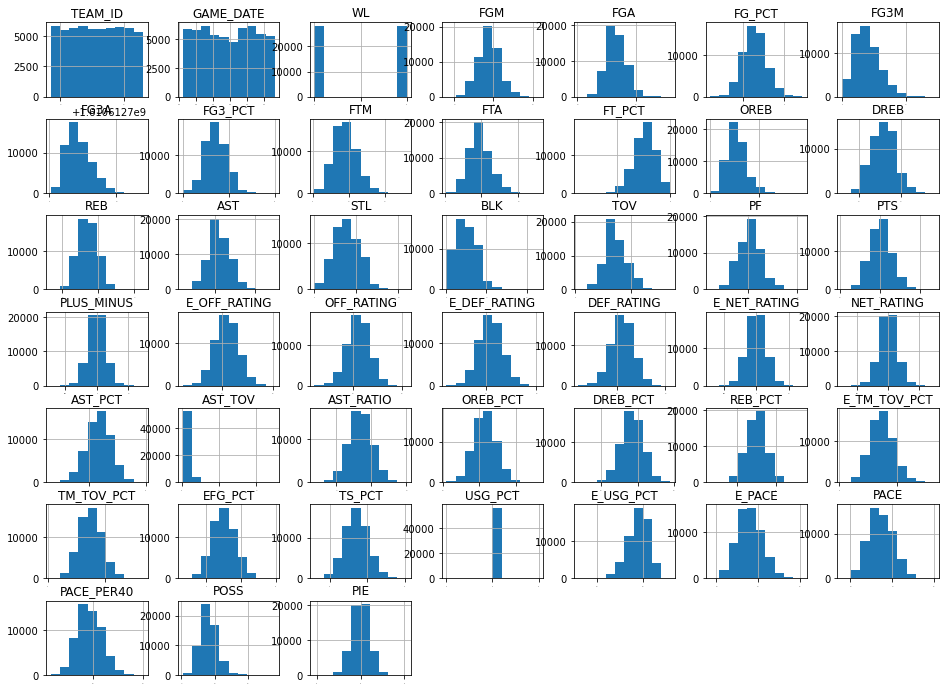

In [44]:
#check distribution of data
team_boxscores_temp_df.hist(figsize=(16,12), xlabelsize=0)

In [17]:
#turn each row's stats into average of last n games
n = 50

non_metric_cols = set(['SEASON', 'TEAM_ID_HOME', 'GAME_ID', 'GAME_DATE', 'TEAM_CITY_HOME', 'TEAM_ID_AWAY','TEAM_CITY_AWAY', 'SPREAD'])
metric_cols = set(team_boxscores_df.columns) - non_metric_cols

moving_average_df = pd.DataFrame(columns=team_boxscores_df.columns)

for i, row in tqdm(team_boxscores_df.iterrows()):
    game_date = row['GAME_DATE']
    home_team = row['TEAM_ID_HOME']
    away_team = row['TEAM_ID_AWAY']
    
    #team_boxscores_historic_df = team_boxscores_temp_df[team_boxscores_temp_df['GAME_DATE'] < game_date].copy()
    
    #if len(team_boxscores_historic_df)==0:
    #    continue
    
    home_team_temp_df = team_boxscores_temp_df[(team_boxscores_temp_df['TEAM_ID']==home_team) &
                                               (team_boxscores_temp_df['GAME_DATE']<game_date)].copy()
    away_team_temp_df = team_boxscores_temp_df[(team_boxscores_temp_df['TEAM_ID']==away_team) &
                                               (team_boxscores_temp_df['GAME_DATE']<game_date)].copy()
    
    if len(home_team_temp_df)<n or len(away_team_temp_df)<n:
        continue
    
    home_team_temp_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)
    away_team_temp_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)
    
    home_team_temp_df = home_team_temp_df.iloc[:n].copy()
    away_team_temp_df = away_team_temp_df.iloc[:n].copy()
    
    new_row = defaultdict()
    for col in team_boxscores_df.columns:
        if col in non_metric_cols:
            new_row[col] = row[col]
        elif col[-4:]=='HOME':
            new_row[col] = home_team_temp_df[col[:-5]].mean()
        elif col[-4:]=='AWAY':
            new_row[col] = away_team_temp_df[col[:-5]].mean()
    moving_average_df = moving_average_df.append(new_row, ignore_index=True)


28152it [32:03, 14.64it/s] 


In [18]:
moving_average_df.head()

,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,TEAM_CITY_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY,SPREAD
0,2021-22,1610612738,0042100404,2022-06-10,0.74,40.76,85.08,0.47920,14.34,37.92,0.37434,17.90,22.14,0.81386,9.68,34.96,44.64,26.54,6.80,6.06,13.30,19.44,113.76,10.64,Boston,115.702,117.470,103.812,106.210,11.892,11.260,0.65278,2.1132,19.666,0.27282,0.71936,0.50802,13.49232,13.708,0.56360,0.60124,1.0,0.19810,98.6924,96.8110,80.6762,96.94,0.56754,1610612744,0.56,41.24,86.16,0.47960,14.18,37.76,0.37716,15.72,20.36,0.77764,9.42,34.20,43.62,26.92,7.56,4.22,14.12,21.78,112.38,2.20,Golden State,112.680,114.332,109.656,112.294,3.030,2.036,0.65184,2.0270,19.700,0.26578,0.73788,0.50772,14.11714,14.324,0.56238,0.59204,1.0,0.19806,100.1784,98.260,81.8832,98.36,0.51552,-10
1,2021-22,1610612738,0042100403,2022-06-08,0.74,40.74,84.94,0.47978,14.36,37.94,0.37470,17.86,22.00,0.81734,9.50,35.04,44.54,26.60,6.84,6.02,13.44,19.52,113.70,10.44,Boston,115.506,117.288,103.842,106.180,11.666,11.108,0.65452,2.0992,19.708,0.26906,0.71686,0.50584,13.61456,13.836,0.56444,0.60220,1.0,0.19806,98.8044,96.9410,80.7846,97.04,0.56694,1610612744,0.58,41.38,86.20,0.48112,14.22,37.76,0.37816,15.84,20.52,0.77682,9.44,34.38,43.82,26.94,7.62,4.28,14.08,21.80,112.82,2.80,Golden State,113.074,114.694,109.316,112.078,3.764,2.612,0.65032,2.0318,19.704,0.26672,0.73962,0.50948,14.06724,14.268,0.56410,0.59376,1.0,0.19800,100.2856,98.320,81.9332,98.44,0.51944,16
2,2021-22,1610612744,0042100402,2022-06-05,0.58,41.40,86.44,0.48022,14.20,37.92,0.37628,15.88,20.48,0.78060,9.64,34.44,44.08,26.92,7.48,4.40,14.08,21.92,112.88,2.50,Golden State,113.108,114.710,109.678,112.468,3.436,2.238,0.64950,2.0302,19.662,0.26990,0.73714,0.50980,14.06462,14.262,0.56288,0.59286,1.0,0.19790,100.2944,98.3300,81.9416,98.48,0.51766,1610612738,0.76,41.02,85.02,0.48276,14.38,38.04,0.37422,17.96,22.20,0.81538,9.56,35.00,44.56,26.60,6.92,6.00,13.26,19.46,114.38,11.42,Boston,116.272,118.008,103.550,105.890,12.724,12.116,0.64942,2.1220,19.710,0.27024,0.71578,0.50646,13.44282,13.654,0.56744,0.60486,1.0,0.19812,98.7644,96.921,80.7680,97.02,0.57244,19
3,2021-22,1610612744,0042100401,2022-06-02,0.60,41.50,86.32,0.48210,14.24,37.74,0.37950,15.96,20.60,0.78022,9.60,34.64,44.24,27.06,7.48,4.34,14.18,22.06,113.20,2.92,Golden State,113.346,114.796,109.402,112.122,3.950,2.672,0.65130,2.0286,19.738,0.26760,0.73808,0.51010,14.15386,14.330,0.56516,0.59504,1.0,0.19788,100.4092,98.5300,82.1082,98.68,0.52006,1610612738,0.76,41.02,84.94,0.48326,14.24,38.04,0.37080,17.84,22.10,0.81184,9.54,35.10,44.64,26.56,6.90,6.02,13.30,19.58,114.12,11.38,Boston,116.080,117.634,103.292,105.612,12.792,12.020,0.64850,2.1126,19.702,0.26770,0.71794,0.50656,13.49394,13.684,0.56720,0.60428,1.0,0.19812,98.7476,96.981,80.8180,97.10,0.57244,-12
4,2021-22,1610612748,0042100307,2022-05-29,0.64,39.32,84.50,0.46744,12.76,35.42,0.36056,17.96,22.32,0.80418,9.02,32.98,42.00,24.06,7.92,3.32,14.00,21.12,109.36,4.14,Miami,110.210,112.

In [19]:
moving_average_df.describe()

,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
count,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.0,27363.000000,27363.000000,27363.00000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.00000,27363.000000,27363.000000,27363.000000,27363.0,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000
mean,0.499720,37.574354,82.857144,0.454375,7.716177,21.642783,0.353151,18.134932,23.887479,0.759815,10.968111,31.664681,42.632792,22.050608,7.561637,4.885918,14.347204,20.949449,100.999818,-0.008688,104.386017,106.000760,104.392569,106.009804,-0.006544,-0.009039,0.585993,1.683664,16.891479,0.288931,0.710935,0.499928,14.824893,15.063598,0.500658,0.541601,1.0,0.198502,96.041610,94.53836,78.781963,95.230415,0.499903,0.501152,37.589612,82.869397,0.454485,7.711762,21.629275,0.353193,18.135495,23.890532,0.759750,10.975500,31.679489,42.654989,22.069817,7.558599,4.892244,14.346593,20.941993,101.026480,0.037636,104.406651,106.023151,104.370225,105.985143,0.036428,0.038018,0.586249,1.685208,16.901805,0.289135,0.711054,0.500131,14.82355,15.062466,0.500733,0.541661,1.0,0.198502,96.043969,94.540723,78.783932,95.234291,0.500259
std,0.150158,2.400021,3.973866,0.016459,2.848099,7.664210,0.022501,1.989690,2.664006,0.030904,1.386731,2.268301,2.148691,2.182141,0.871252,0.829946,1.198662,1.697491,6.900023,4.516798,4.288931,4.307863,4.023434,4.044215,4.943180,4.677357,0.040790,0.241572,1.226520,0.029023,0.023277,0.014385,1.312626,1.338328,0.026002,0.023240,0.0,0.000478,3.869298,3.73015,3.108451,3.713394,0.033002,0.149817,2.407686,3.974908,0.016495,2.844052,7.653905,0.022395,1.992495,2.668746,0.030916,1.386693,2.268042,2.146618,2.184721,0.875481,0.829591,1.198638,1.698412,6.908689,4.512157,4.293942,4.312214,4.028427,4.046632,4.936735,4.673248,0.040707,0.242796,1.227953,0.029061,0.023192,0.014372,1.31426,1.340235,0.025998,0.023245,0.0,0.000476,3.866339,3.726711,3.105585,3.710417,0.032956
min,0.080000,31.120000,73.040000,0.397320,2.380000,7.480000,0.255080,10.980000,15.420000,0.627200,6.980000,26.000000,34.800000,16.280000,5.080000,2.240000,10.500000,15.640000,81.560000,-15.040000,86.832000,89.402000,87.912000,89.236000,-17.0

In [20]:
def check_missing_vals(df):
    cols_w_missing_vals = []
    for col in df.columns:
        if df[col].isna().sum() != 0:
            cols_w_missing_vals.append(col)
    return cols_w_missing_vals

In [21]:
check_missing_vals(moving_average_df)

[]

In [22]:
moving_average_df.to_csv('moving_average_df_%s.csv' % (str(n)))

In [23]:
#turn each row's stats into weighted average of last n games
#n = 40
non_metric_cols = set(['SEASON', 'TEAM_ID_HOME', 'GAME_ID', 'GAME_DATE', 'TEAM_CITY_HOME', 'TEAM_ID_AWAY','TEAM_CITY_AWAY', 'SPREAD'])
metric_cols = set(team_boxscores_df.columns) - non_metric_cols

weights = np.linspace(1.5, 0.5, n)
weighted_average_df = pd.DataFrame(columns=team_boxscores_df.columns)

for i, row in tqdm(team_boxscores_df.iterrows()):
    game_date = row['GAME_DATE']
    home_team = row['TEAM_ID_HOME']
    away_team = row['TEAM_ID_AWAY']
    
    home_team_temp_df = team_boxscores_temp_df[(team_boxscores_temp_df['TEAM_ID']==home_team) &
                                               (team_boxscores_temp_df['GAME_DATE']<game_date)].copy()
    away_team_temp_df = team_boxscores_temp_df[(team_boxscores_temp_df['TEAM_ID']==away_team) &
                                               (team_boxscores_temp_df['GAME_DATE']<game_date)].copy()
    
    if len(home_team_temp_df)<n or len(away_team_temp_df)<n:
        continue
    
    home_team_temp_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)
    away_team_temp_df.sort_values(by='GAME_DATE', ascending=False, inplace=True)
    
    home_team_temp_df = home_team_temp_df.iloc[:n].copy()
    away_team_temp_df = away_team_temp_df.iloc[:n].copy()
    
    new_row = defaultdict()
    for col in team_boxscores_df.columns:
        if col in non_metric_cols:
            new_row[col] = row[col]
        elif col[-4:]=='HOME':
            new_row[col] = np.average(home_team_temp_df[col[:-5]], weights=weights)
            #new_row[col] = home_team_temp_df[col[:-5]].mean()
        elif col[-4:]=='AWAY':
            new_row[col] = np.average(away_team_temp_df[col[:-5]], weights=weights)
            #new_row[col] = away_team_temp_df[col[:-5]].mean()
    weighted_average_df = weighted_average_df.append(new_row, ignore_index=True)

weighted_average_df.head()

28152it [33:12, 14.13it/s] 


,SEASON,TEAM_ID_HOME,GAME_ID,GAME_DATE,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,TEAM_CITY_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,TEAM_ID_AWAY,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,TEAM_CITY_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY,SPREAD
0,2021-22,1610612738,0042100404,2022-06-10,0.714082,40.111837,84.378776,0.475176,14.402245,37.882449,0.375946,18.062653,22.376531,0.811482,9.406122,34.760816,44.166939,26.306327,6.711020,6.043878,13.506735,19.789796,112.688571,9.506939,Boston,114.740347,116.637857,104.167837,106.538429,10.574000,10.094490,0.658291,2.075310,19.581367,0.272161,0.721407,0.507841,13.719786,13.957347,0.560459,0.598989,1.0,0.198227,98.492608,96.575337,80.479733,96.705510,0.560889,1610612744,0.584898,41.226939,85.904898,0.481089,14.047959,37.227755,0.379027,15.706939,20.358367,0.777193,9.507551,34.375510,43.883061,27.034694,7.366531,4.343061,14.308571,21.746735,112.208776,2.626939,Golden State,112.720612,114.347020,109.263510,111.830102,3.459000,2.516490,0.654832,2.012618,19.787224,0.266921,0.738869,0.510280,14.319271,14.530490,0.563346,0.592904,1.0,0.197981,100.012694,98.130612,81.775437,98.222449,0.518928,-10
1,2021-22,1610612738,0042100403,2022-06-08,0.708776,40.056122,84.228776,0.475388,14.439592,37.952041,0.376194,18.061020,22.268571,0.815383,9.207551,34.861224,44.068776,26.306531,6.726939,6.004694,13.603265,19.879592,112.612857,9.297551,Boston,114.552592,116.452367,104.166755,106.519551,10.387367,9.927878,0.659198,2.063886,19.593510,0.267522,0.718308,0.505017,13.802627,14.043959,0.561034,0.599841,1.0,0.198148,98.601922,96.687500,80.573243,96.795102,0.559988,1610612744,0.606327,41.403878,86.091429,0.482208,14.051224,37.182041,0.379571,15.822449,20.547755,0.774959,9.587347,34.653265,44.240612,27.145102,7.407959,4.357143,14.229796,21.731837,112.681429,3.298367,Golden State,113.082510,114.689898,108.880367,111.521980,4.204163,3.166449,0.654906,2.030059,19.828000,0.268938,0.742716,0.513215,14.219528,14.425429,0.564295,0.593785,1.0,0.197932,100.149935,98.237347,81.864380,98.351429,0.523184,16
2,2021-22,1610612744,0042100402,2022-06-05,0.597755,41.462449,86.215510,0.482332,14.025306,37.277551,0.378083,15.880000,20.538367,0.778417,9.757551,34.650204,44.407755,27.174694,7.187347,4.463673,14.272245,21.889796,112.830204,2.817755,Golden State,113.239796,114.787571,109.504551,112.171633,3.737388,2.614388,0.654686,2.028276,19.821367,0.271400,0.740652,0.513467,14.262346,14.460551,0.564157,0.593942,1.0,0.197841,100.147102,98.259082,81.882522,98.400816,0.520609,1610612738,0.733878,40.415306,84.369592,0.479017,14.436531,38.021224,0.375335,18.210204,22.470612,0.815471,9.308980,34.801224,44.110204,26.359592,6.804490,5.974694,13.399796,19.880612,113.477347,10.388367,Boston,115.505102,117.373347,103.972633,106.290469,11.534041,11.076939,0.653679,2.092412,19.621204,0.269113,0.716561,0.505548,13.608707,13.839408,0.564482,0.603195,1.0,0.198200,98.544461,96.666092,80.555445,96.765510,0.566185,19
3,2021-22,1610612744,0042100401,2022-06-02,0.619592,41.561429,86.123673,0.484032,13.947347,37.043061,0.378760,16.019592,20.710204,0.779199,9.689388,34.90204

In [24]:
weighted_average_df.describe()

,WL_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,FG3M_HOME,FG3A_HOME,FG3_PCT_HOME,FTM_HOME,FTA_HOME,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME,PLUS_MINUS_HOME,E_OFF_RATING_HOME,OFF_RATING_HOME,E_DEF_RATING_HOME,DEF_RATING_HOME,E_NET_RATING_HOME,NET_RATING_HOME,AST_PCT_HOME,AST_TOV_HOME,AST_RATIO_HOME,OREB_PCT_HOME,DREB_PCT_HOME,REB_PCT_HOME,E_TM_TOV_PCT_HOME,TM_TOV_PCT_HOME,EFG_PCT_HOME,TS_PCT_HOME,USG_PCT_HOME,E_USG_PCT_HOME,E_PACE_HOME,PACE_HOME,PACE_PER40_HOME,POSS_HOME,PIE_HOME,WL_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,FG3A_AWAY,FG3_PCT_AWAY,FTM_AWAY,FTA_AWAY,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY,PLUS_MINUS_AWAY,E_OFF_RATING_AWAY,OFF_RATING_AWAY,E_DEF_RATING_AWAY,DEF_RATING_AWAY,E_NET_RATING_AWAY,NET_RATING_AWAY,AST_PCT_AWAY,AST_TOV_AWAY,AST_RATIO_AWAY,OREB_PCT_AWAY,DREB_PCT_AWAY,REB_PCT_AWAY,E_TM_TOV_PCT_AWAY,TM_TOV_PCT_AWAY,EFG_PCT_AWAY,TS_PCT_AWAY,USG_PCT_AWAY,E_USG_PCT_AWAY,E_PACE_AWAY,PACE_AWAY,PACE_PER40_AWAY,POSS_AWAY,PIE_AWAY
count,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.0,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.0,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000,27363.000000
mean,0.499577,37.585883,82.871312,0.454436,7.734268,21.693061,0.353184,18.131118,23.880790,0.759863,10.962591,31.671010,42.633601,22.057591,7.560473,4.883742,14.343559,20.944038,101.037152,-0.013631,104.410180,106.026767,104.421903,106.040958,-0.011708,-0.014190,0.585993,1.684626,16.894866,0.288831,0.711007,0.499913,14.819176,15.057996,0.500818,0.541735,1.0,0.198500,96.055316,94.550604,78.792166,95.241948,0.499865,0.501278,37.604876,82.890626,0.454551,7.729756,21.678055,0.353219,18.134280,23.886767,0.759827,10.973191,31.687652,42.660843,22.080181,7.558216,4.891269,14.342182,20.935236,101.073789,0.041850,104.436084,106.054452,104.395444,106.012003,0.040632,0.042467,0.586280,1.686513,16.906352,0.289081,0.711137,0.500145,14.816418,15.055420,0.500893,0.541798,1.0,0.198500,96.061834,94.557146,78.797617,95.250289,0.500292
std,0.151735,2.417347,3.999650,0.016656,2.860085,7.693208,0.023029,2.014968,2.692000,0.031267,1.400023,2.282961,2.172533,2.202347,0.883077,0.839447,1.213097,1.709932,6.942511,4.560385,4.331263,4.350368,4.065095,4.085072,4.988691,4.722502,0.041129,0.244575,1.239237,0.029283,0.023490,0.014577,1.326453,1.352516,0.026200,0.023439,0.0,0.000489,3.885392,3.745893,3.121571,3.731164,0.033277,0.151529,2.426567,3.995894,0.016729,2.855489,7.678338,0.022884,2.013800,2.692005,0.031284,1.401001,2.282132,2.169894,2.204118,0.885943,0.839030,1.213743,1.710087,6.954997,4.561360,4.342122,4.359610,4.074687,4.091858,4.988307,4.724178,0.041021,0.245834,1.240599,0.029294,0.023414,0.014562,1.327175,1.353565,0.026229,0.023478,0.0,0.000487,3.881291,3.741905,3.118246,3.727160,0.033280
min,0.073061,30.675918,73.053265,0.395427,2.366531,7.373265,0.251243,11.108367,15.248163,0.621670,6.942245,25.925714,34.759184,15.921633,5.036122,2.135102,10.323469,15.370204,81.365714,-15.227347,87.701204,90.223531,87.838837,89.082061

In [25]:
weighted_average_df.to_csv('weighted_average_df_%s.csv' %(str(n)))

In [26]:
#to do:
#correct col dtypes
#plot metric distributions and check for anamolies
#check for correlations (may need to minimize multi-colinearity in order to utilize some models)
#train and eval baseline model

In [27]:
#turn each row's stats into weighted average of last n game stats

#instead of taking average of all metrics, it may be better to recalculate some of the agg metrics (e.g FB_PCT, AST_TOV, etc.)
#over last n games

In [28]:
print('weighted_average_df_%s.csv' %(str(n)))

weighted_average_df_50.csv
